# Using Support Vector Machines and Nueral Networks to Analyze Diabetes in Native Americans

The data used is from https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1#diabetes.csv

$\textbf{Citation}$: Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988).
Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceed-
ings of the Symposium on Computer Applications and Medical Care (pp. 261 - 265). IEEE
Computer Society Press.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Impressions of the  Data Set

### Importing the Data

In [1]:
# Basic Packages
import numpy as np
import numpy.random as rnd
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\samsi\Anaconda3\envs\hello-tf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#create file path from computer
file_path = r'C:\Users\samsi\Desktop\Work Folder\Machine Learning\diabetes.csv'
#read the csv file
df = pd.read_csv (file_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Variables Used

Looking at the output of `df`, there are eight features and one output.

$\textbf{Features}$
- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure (mm Hg)
- `SkinThickness`: Triceps skin fold thickness (mm)
- `Insulin`: 2-Hour serum insulin (mu U/ml)
- `BMI`: Body mass index (weight in kg/(height in m)^2)
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: age in (years): 
    
$\textbf{Output}$
- `Outcome`: Class variable (0 or 1) 268 of 768 are 1, the others are 0


We can summarize out dataframe using the `.describe()` function.  This will let us see the count, mean, standard deviation, minimum, interquartile range, and maximum.  By looking at the descriptive statistics we can see how large and how disperse data set is.  This can be useful when looking for outliers and if scaling the data is neccesary.  Typically, one scales the features of a data set when the features are on very different scales and when there are a lot of variables.  Since our data set only has eight features it seems scaling would not be that important, however, since the ranges of our variables are quite different then it would be smart to scale before running a model.  For example, `Pregnancies` and `BloodPressure` are a pair of variables on very different scales, thus confirming the need to scale data PROVIDE NUMBERS LATER.  Additionally, the range for `Insulin` is extremely large, which also creates a need for scaling data.

In [3]:
# summarize the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Not every feature is neccesairly going to be valuable when running a model.  To see if a variable impacts the outcome, we can use the seaborn package to visulize and look for relationships. 

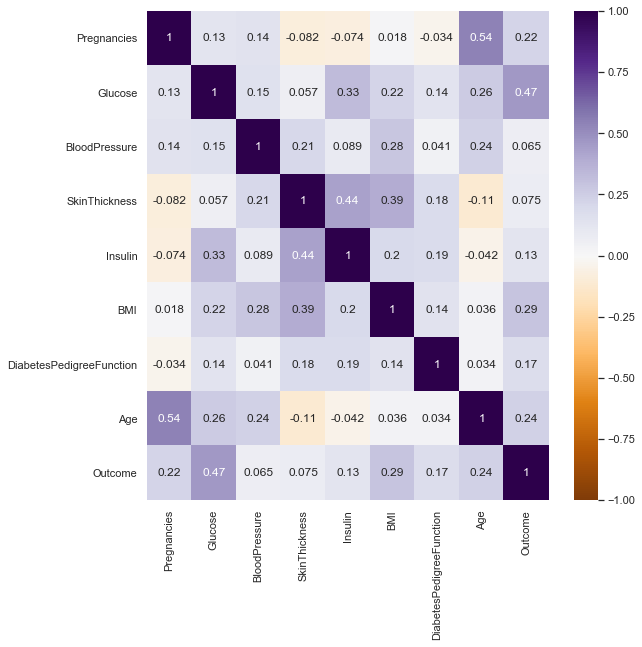

In [4]:
import seaborn as sns
# Documentation: https://seaborn.pydata.org/

# Visualizing correlation with Seaborn
sns.set(rc={'figure.figsize':(9,9)})
sns.heatmap(df.corr(), cmap="PuOr", annot=True, vmin=-1, vmax=1)

Glucose levels have a strong effect on the outcome.  It makes sense that pregnancies is correlated with age.

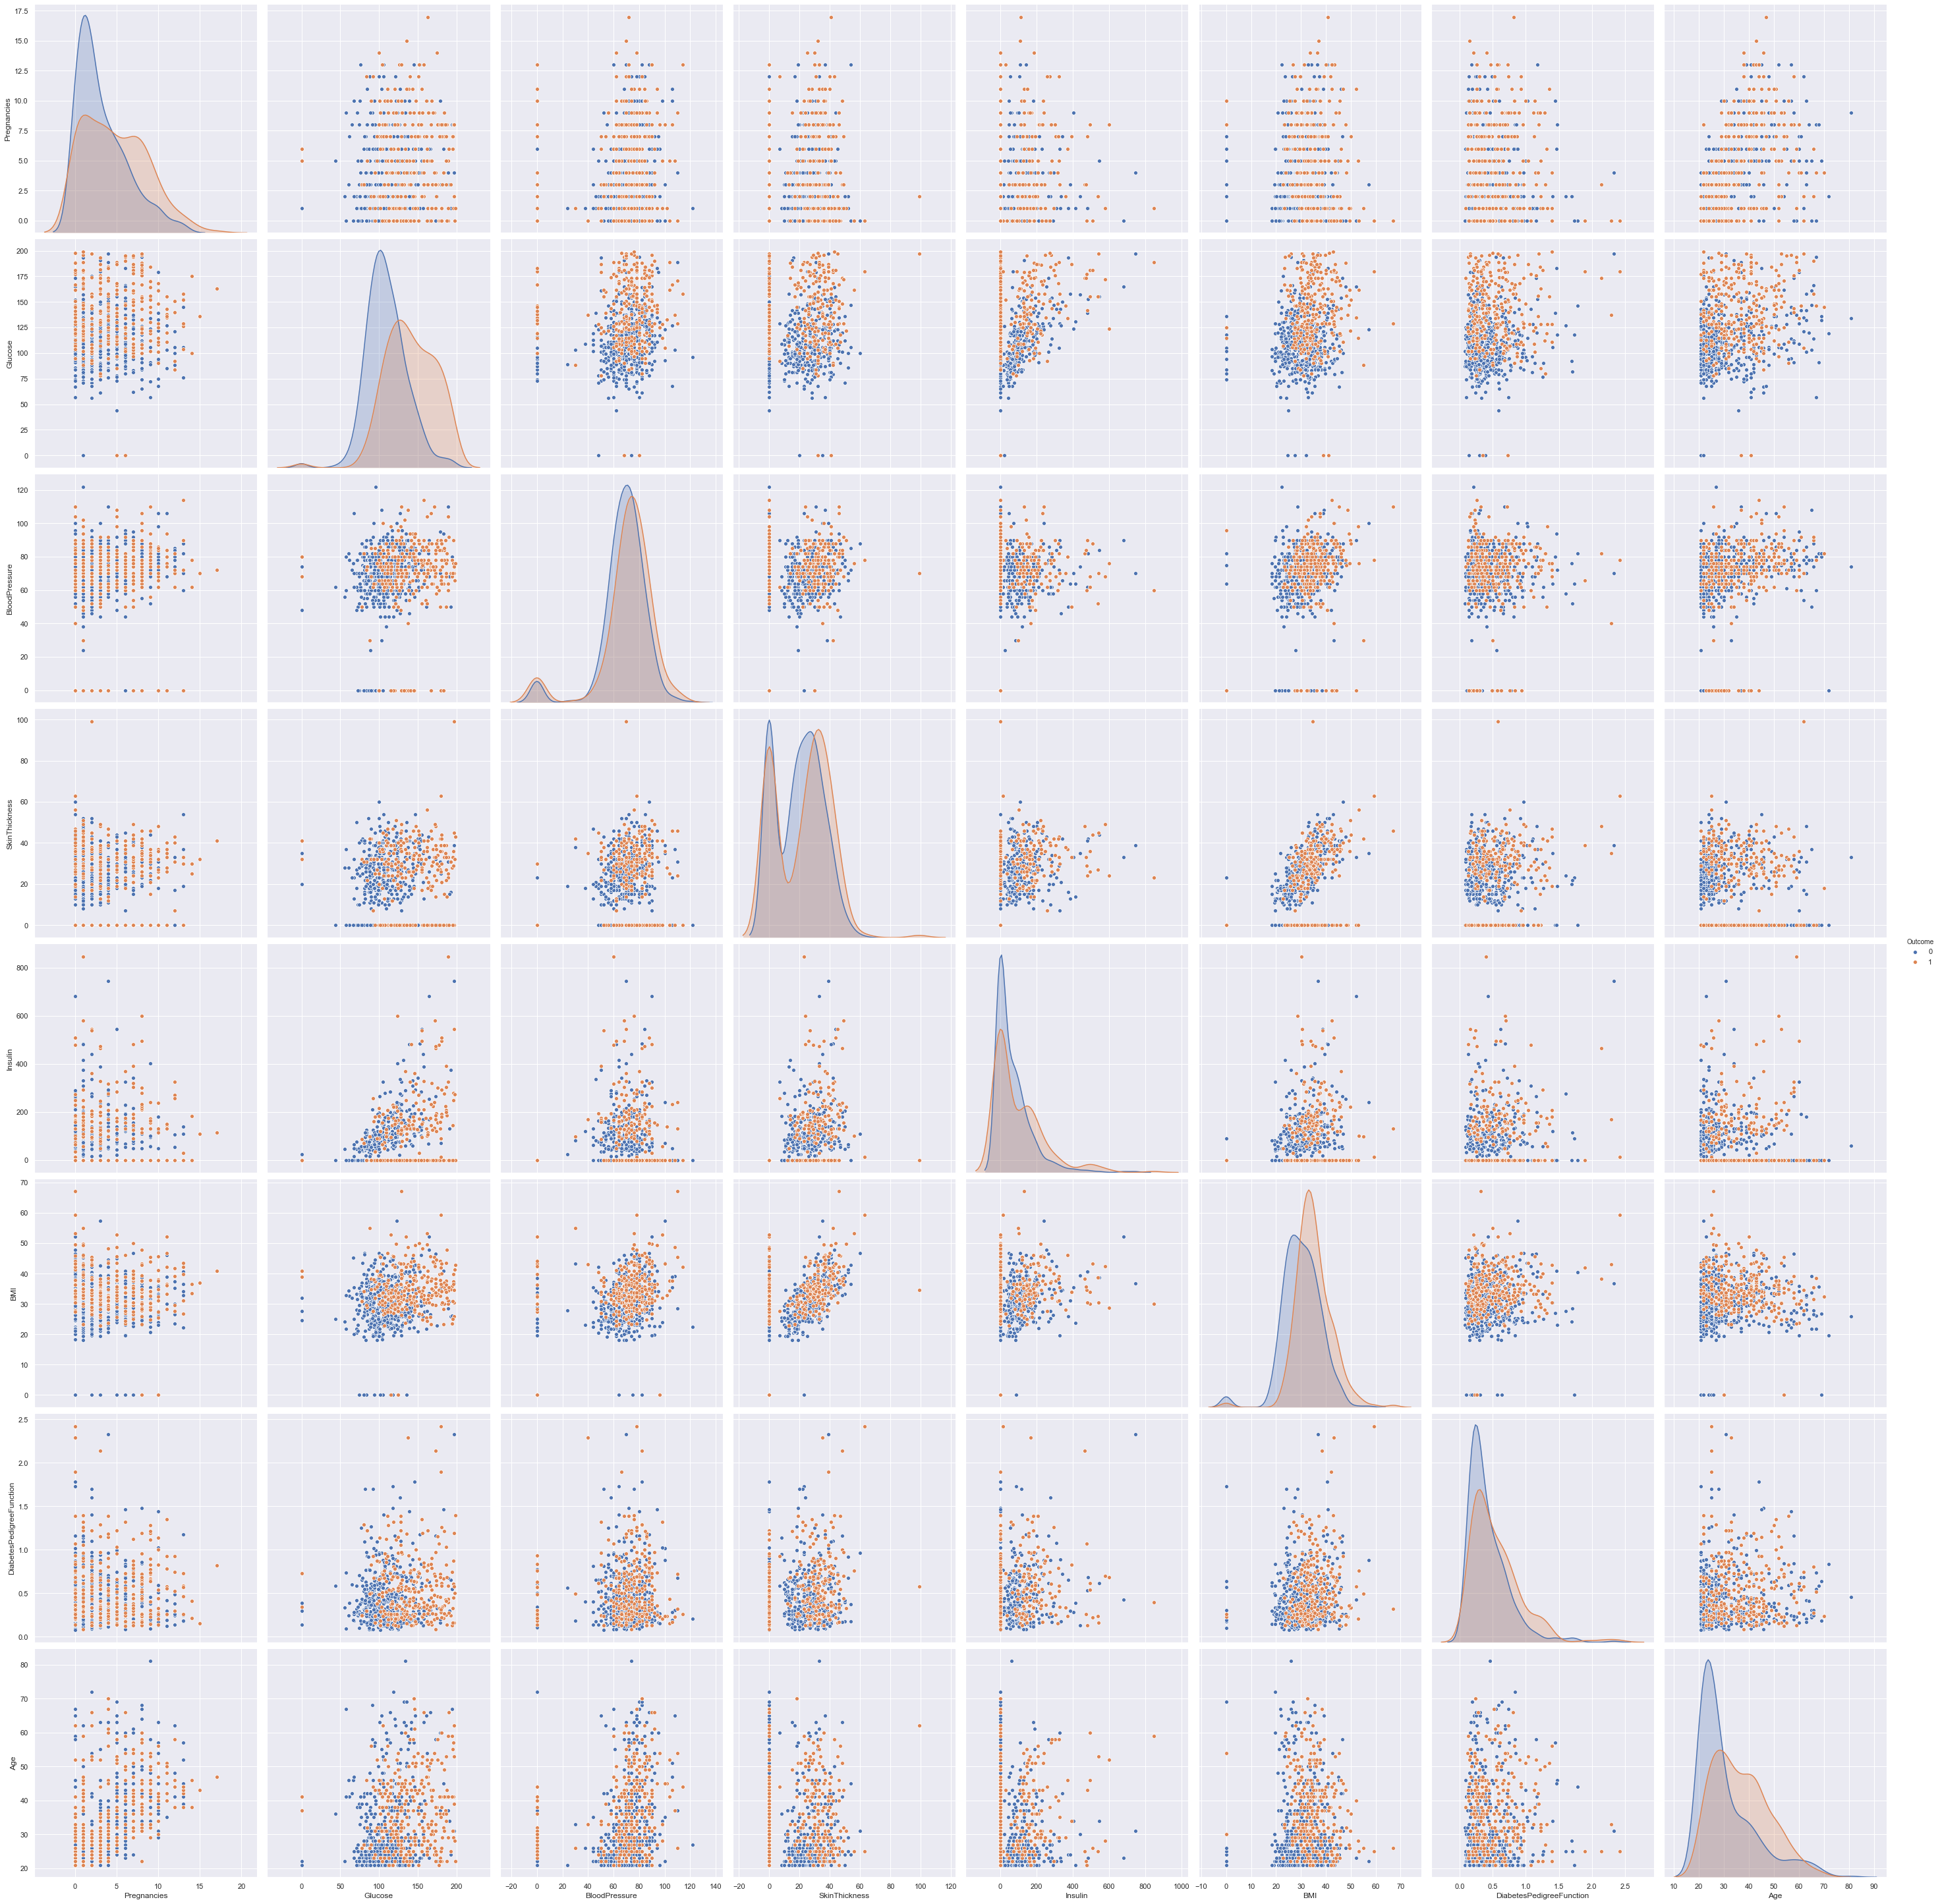

In [5]:
# Delete all rows that contain NaN or not numbers
df.dropna(inplace=True)

# Plot all of the variable-to-variable relations as scatterplots 
sns.pairplot(df,height=5, hue = 'Outcome')

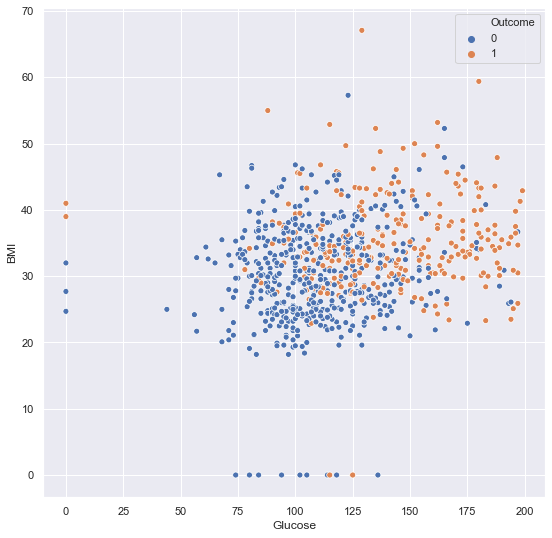

In [6]:
ax = sns.scatterplot(x="Glucose", y="BMI", hue="Outcome",
                     data=df)
ax

The seaborn package lets us visualize relationships between all variables in our data set, this is an excellent way to determine correlations.  However, there are not very many strong relationships between our data.

## Choosing Models

 Since I have classification data I can choose between multiplemodels.  These models include logistic regression, nearest neighbors, supper vector machines (SVM), and neural networks.  For this project I will make an SVM and neural network.

### Cleaning Data

There are false zeros in both Glucose and BloodPressure. Will remove.

In [7]:
mask1 = df['BMI'] != 0
mask2 = df['Glucose'] != 0

# created other masks but since Im only looking at BMI and Glucose for my SVM model I dont want to reduce my df too much
'''
mask3 = df['BloodPressure'] != 0
mask4 = df['SkinThickness'] != 0
mask5 = df['Insulin'] != 0
mask6 = df['BMI'] != 0
'''

mask = mask1 & mask2 

df_cleaned = df.where(mask)
df_cleaned = df_cleaned[mask]
df_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


## Creating a Support Vector Machine

In [8]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [9]:
# Utilities for Cross-Validation, Model Optimization, and Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

You can use a support vector machine (SVM) when your data has exactly two classes. An SVM classifies data by finding the best hyperplane that separates all data points of one class from those of the other class. The best hyperplane for an SVM means the one with the largest margin between the two classes.

In [48]:
y = df_cleaned['Outcome'] #Outcome
X = df_cleaned[['Pregnancies', 'Glucose', 'SkinThickness', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] #Features

print(X.shape)
print(y.shape)

(752, 8)
(752,)


### Choosing Features

In [49]:
le = LabelEncoder() # save function as `le`, will encode labels and transform
le.fit(df['Outcome']) # emcodes "Seed Type" column
print(list(le.classes_)) # prints all unique classes

# choosing features from df
X = df_cleaned[['Glucose', 'BMI']].to_numpy() # saves features into X dataframe
y = le.transform(df_cleaned['Outcome']) # saves output column to y

print(X.shape) #print the shape of X
print(y.shape) #print the shape of y

[0, 1]
(752, 2)
(752,)


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

RN = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, stratify=y, random_state=RN)
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of y_train:", y_train.shape)
print("Size of y_test:", y_test.shape)

Size of X_train: (676, 2)
Size of X_test: (76, 2)
Size of y_train: (676,)
Size of y_test: (76,)


Stratify the split to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set.

In [51]:
#scale the data and save scaling factors
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_train_scale = scaler.fit_transform(X_train) #scale on X train
X_test_scale = scaler.transform(X_test) #scale on X test

### Visualize the Cleaned Data

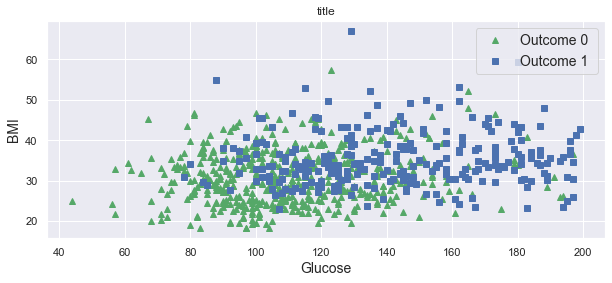

In [52]:
plt.figure(figsize=(10, 4)) # size of figure

# plot points in X dataframe based on color and marker shape, determined by the classes in y.
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^", label="Outcome 0 ") #glucose
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Outcome 1") #bloodpressure


# plot labels and formatting
plt.xlabel("Glucose", fontsize=14)
plt.ylabel("BMI", fontsize=14)
plt.legend(loc="upper right", fontsize=14)
plt.title('title')
plt.show()

### Find Best Parameters

In [53]:
from sklearn import svm

# creating parameters to vary over to find best combo
parameters = {'kernel':['rbf', 'linear'], 'C':[0.0001, 0.001, 0.01, .1, 1,10,100,1000], 
              'gamma':[0.0001, 0.001, 0.01, .1, 1,10,100,1000]}

svc = svm.SVC()

clf = GridSearchCV(svc, parameters, cv =5)
clf.fit(X_train_scale, y_train)

#output best params and scores
print('Grid best parameter (max. accuracy): ', clf.best_params_)
print('Grid best score (accuracy): {:.3f}'.format(clf.best_score_))

Grid best parameter (max. accuracy):  {'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}
Grid best score (accuracy): 0.759


I choose a range of C and gamma to be `[0.0001, 0.001, 0.01, .1, 1,10,100,1000]` because they are on a log scale.  

The gamma parameter "defines how far the influence of a single trainingexample reaches, with low values meaning ‘far’ and high values meaning ‘close’." For larger values of C,a smaller margin will be accepted if the decision function is better at classifying all training points correctly.  Alower C will encourage a larger margin.

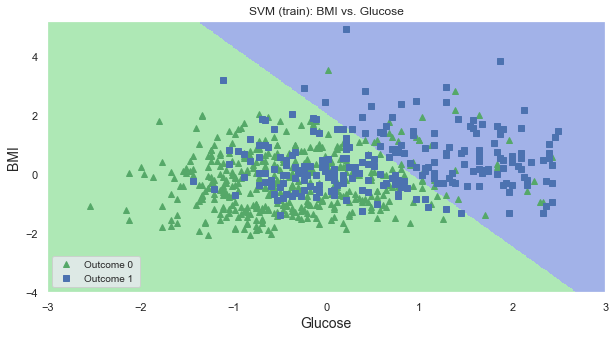

In [54]:
# using SVC to make model
clf = SVC(kernel = 'linear', C = 0.01, gamma = 0.0001)
clf.fit(X_train_scale, y_train) # fit on training data

# make arrays for contours 
x0, x1 = np.meshgrid(
        np.linspace(-3, 3, 500).reshape(-1, 1),
        np.linspace(-4, 5.2, 200).reshape(-1, 1),
    )

# create X_new
X_new = np.c_[x0.ravel(), x1.ravel()] # ravel to make rows
y_predict = clf.predict(X_new)
zz = y_predict.reshape(x0.shape) #reshape the y predicted

# plot points where categorized by color and shape based on the y class
plt.figure(figsize=(10, 5))
plt.plot(X_train_scale[:, 0][y_train==0], X_train_scale[:, 1][y_train==0], "g^", label="Outcome 0 ")
plt.plot(X_train_scale[:, 0][y_train==1], X_train_scale[:, 1][y_train==1], "bs", label="Outcome 1")

from matplotlib.colors import ListedColormap
# create contour map and add colors
custom_cmap = ListedColormap(['#aee8b5','#a2b2e8'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)

# plot formatting and text
plt.xlabel("Glucose", fontsize=14)
plt.ylabel("BMI", fontsize=14)
plt.legend(loc="lower left", fontsize=10)
plt.title('SVM (train): BMI vs. Glucose')
plt.show()

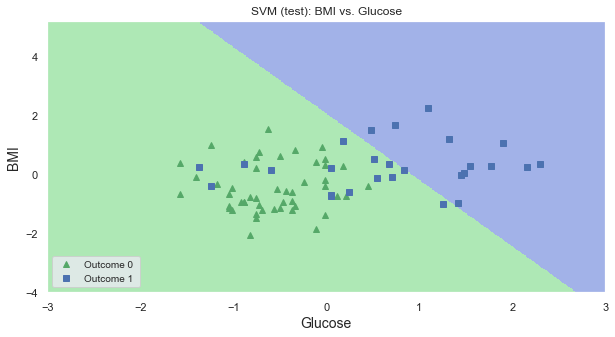

In [55]:
# plot points where categorized by color and shape based on the y class
plt.figure(figsize=(10, 5))
plt.plot(X_test_scale[:, 0][y_test==0], X_test_scale[:, 1][y_test==0], "g^", label="Outcome 0 ")
plt.plot(X_test_scale[:, 0][y_test==1], X_test_scale[:, 1][y_test==1], "bs", label="Outcome 1")

from matplotlib.colors import ListedColormap
# create contour map and add colors
custom_cmap = ListedColormap(['#aee8b5','#a2b2e8'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)

# plot formatting and text
plt.xlabel("Glucose", fontsize=14)
plt.ylabel("BMI", fontsize=14)
plt.legend(loc="lower left", fontsize=10)
plt.title('SVM (test): BMI vs. Glucose')
plt.show()

### Best Paramters

When running GridSearch, the linear SVC is the best.  However, if I remove the linear option all together, I recieve an rbf model that has the same accuracy.  I will use the linear kernel since it allows for the prediction of diabetes at very high glucose levels (a deciding factor when diagnosing diabetes).

$\textbf{Linear Model}$

Grid best parameter (max. accuracy):  {'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}

Grid best score (accuracy): 0.759

Testing Accuracy:  0.7763157894736842

Training Accuracy:  0.7588757396449705


$\textbf{RBF Model}$

Grid best parameter (max. accuracy):  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

Grid best score (accuracy): 0.759

Testing Accuracy:  0.7763157894736842

Training Accuracy:  0.7588757396449705

### Check Accuracy

In [56]:
# use predict to see how well the model does on testing data
y_predict=clf.predict(X_test_scale)
score=y_predict==y_test
print("Testing Accuracy: ", score.sum()/len(score))

# use predict to see how well the model does on training data 
y_predict=clf.predict(X_train_scale)
score=y_predict==y_train
print("Training Accuracy: ", score.sum()/len(score))

Testing Accuracy:  0.8026315789473685
Training Accuracy:  0.7544378698224852


### ROC Curve

Evaluate classifier output quality using cross-validation.

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

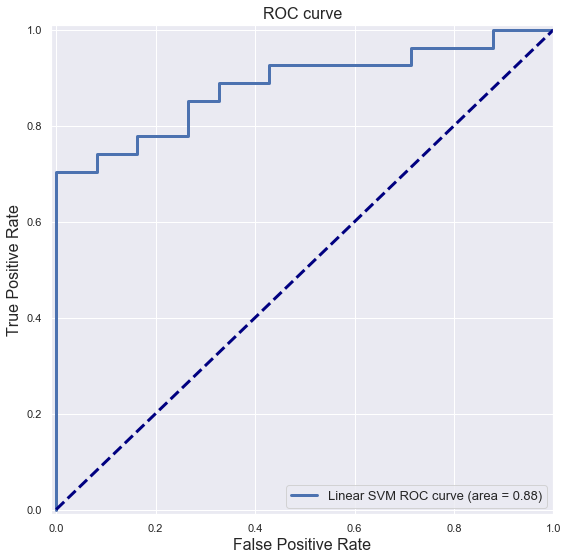

In [19]:
from sklearn.metrics import roc_curve, auc

svm = SVC(kernel='linear', C=0.01, gamma = 0.0001).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

y_score_svm = svm.fit(X_train, y_train).decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_svm, tpr_svm, lw=3, label='Linear SVM ROC curve (area = {:0.2f})'.format(roc_auc_svm))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
#plt.axes().set_aspect('equal')
plt.show()

ROC is a probability curve and AUC represents degree or measure of separability, which it shows how well the model is able to distinguish between classes.
A higher AUC implies that the model is better at predicting true 0s and 1s. 
In this case, the higher the AUC, the better the model is at distinguishing between patients with diabetes and no diabetes.
It is okay to receive some false positives, since it would lead to the patient to get additional tests where they are hopefully diagnosed as healthy. 
However, false negatives could be very dangerous.

## Creating a Neural Network

### Prepping Data for Neural Network

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from sklearn.model_selection import train_test_split
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier

# import data
y = df['Outcome'] #Outcome
X = df[['Pregnancies', 'Glucose', 'SkinThickness', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] #Features

print(X.shape)
print(y.shape)

# scale data
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)


# Split data into training, testing, and validation
RN = 20
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=RN)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,  random_state=RN) # 0.25 x 0.8 = 0.2
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of X_val:", X_val.shape)
print("Size of y_train:", y_train.shape)
print("Size of y_test:", y_test.shape)
print("Size of y_val:", y_val.shape)

(768, 8)
(768,)
Size of X_train: (460, 8)
Size of X_test: (154, 8)
Size of X_val: (154, 8)
Size of y_train: (460,)
Size of y_test: (154,)
Size of y_val: (154,)


### Create Model

I will use the relu and sigmoid activation functions because they exist between 0 and 1 (like the Outcome data).
For the MNIST dataset we used a softmax function, however, since I only have two classes (0 and 1s), I should end on a sigmoid function.

Use dense layers because there should be an association between the features, and I used dropout layers for regularization.
Dropout layers help avoid overfitting

In [59]:
# create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(14, input_dim=8, activation='relu')) # input layer requires input_dim param
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1

In [60]:
# Look at the model summary
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 14)                126       
_________________________________________________________________
dense_57 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_58 (Dense)             (None, 4)                 36        
_________________________________________________________________
dropout_36 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 5         
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Explore the initialization of the weights and biases = theta values 
model.layers

In [62]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [63]:
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[-0.4049602  -0.30781496 -0.39387444  0.18508017 -0.12731537  0.31941903
   0.43058985 -0.41136846]
 [ 0.04170972 -0.3554632  -0.38234246 -0.17925388 -0.30544865 -0.17217124
   0.22631341 -0.24001825]
 [-0.03396645 -0.45742136  0.32468432  0.34930056 -0.27840704  0.32445288
   0.20505607 -0.00455958]
 [ 0.01791984  0.25418973 -0.25780028 -0.00346464 -0.22910383  0.26662344
  -0.27558428 -0.4734331 ]
 [-0.47076747 -0.18645477 -0.1341821   0.40649092  0.39132535 -0.03023291
   0.46245533  0.38818222]
 [ 0.30487466 -0.27492464 -0.11649421 -0.16977417 -0.10497341 -0.4816713
   0.22311872 -0.29346156]
 [-0.40968585  0.3307116  -0.07450032 -0.06907654  0.4448349   0.0415343
   0.09961599 -0.50106364]
 [ 0.05167216 -0.47069427 -0.15063074 -0.15343371  0.3959744  -0.35552287
  -0.36944854 -0.05592182]
 [ 0.38105166 -0.06515199 -0.03245878 -0.35894412 -0.2118491  -0.46097636
  -0.2951981   0.02011836]
 [-0.10497642 -0.12090647 -0.0917578   0.01469308  0.49864322 -0.2904594
  -0.26688713  0.321

### Compile Model

In [64]:
# compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

Use Binary Cross-Entropy loss. It is a Sigmoid activation plus a Cross-Entropy loss.

In [65]:
# call the function to fit to the data (training the network)
history = model.fit(X_train, y_train, epochs = 100, batch_size=20, validation_data=(X_val, y_val))
model.save('weights.h5')

Train on 460 samples, validate on 154 samples
Epoch 1/100
460/460 [==============================] - 0s 400us/step - loss: 0.6978 - accuracy: 0.4370 - val_loss: 0.6969 - val_accuracy: 0.4870
Epoch 2/100
460/460 [==============================] - 0s 61us/step - loss: 0.6837 - accuracy: 0.5783 - val_loss: 0.6858 - val_accuracy: 0.6299
Epoch 3/100
460/460 [==============================] - 0s 60us/step - loss: 0.6744 - accuracy: 0.6587 - val_loss: 0.6761 - val_accuracy: 0.6883
Epoch 4/100
460/460 [==============================] - 0s 58us/step - loss: 0.6702 - accuracy: 0.6783 - val_loss: 0.6659 - val_accuracy: 0.7273
Epoch 5/100
460/460 [==============================] - 0s 55us/step - loss: 0.6561 - accuracy: 0.7174 - val_loss: 0.6546 - val_accuracy: 0.7468
Epoch 6/100
460/460 [==============================] - 0s 55us/step - loss: 0.6486 - accuracy: 0.7239 - val_loss: 0.6417 - val_accuracy: 0.7597
Epoch 7/100
460/460 [==============================] - 0s 55us/step - loss: 0.6327 - accu

### Evaluate Model

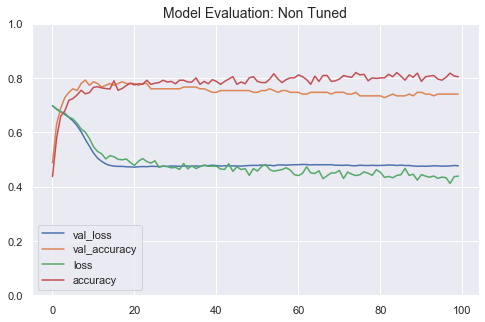

154/154 [==============================] - 0s 20us/step
[0.5732462762238143, 0.7467532753944397]


In [66]:
# Plot the training history
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.title('Model Evaluation: Non Tuned', size = 14)
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Check the accuracy of the model
print(model.evaluate(X_test, y_test))

### Hyperparamter Tuning a Nueral Network

In [67]:
# Defining the model

def create_model(neuron_size1, neuron_size2, neuron_size3, learning_rate, dropout_rate):
    model = Sequential()
    model.add(Dense(neuron_size1, input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron_size2, kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    #model.add(Dense(neuron_size3, activation='relu'))
    model.add(Dense(1,activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = optimizers.SGD(lr = learning_rate), metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 40, epochs = 10)

# Define the grid search parameters

learning_rate =[0.001,0.01,0.1]
dropout_rate = [0.0,0.1]
neuron_size1 = [16,12,8]
neuron_size2 = [8,6,4]
#neuron_size3 = [4,2,0]

RandomSearch would probably be a lot faster but I like being able to input my own values so I did a GridSearch.  Too many layers or parameters would crash browser.

In [68]:
# only run when needed, takes 10 or so min

'''
param_grids = dict(neuron_size1 = neuron_size1, neuron_size2 = neuron_size2, learning_rate = learning_rate, dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = 5, verbose = 0)
grid_result = grid.fit(X_train, y_train)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))
'''

"\nparam_grids = dict(neuron_size1 = neuron_size1, neuron_size2 = neuron_size2, learning_rate = learning_rate, dropout_rate = dropout_rate)\n\n# Build and fit the GridSearchCV\n\ngrid = GridSearchCV(estimator = model, param_grid = param_grids, cv = 5, verbose = 0)\ngrid_result = grid.fit(X_train, y_train)\n\n# Summarize the results\nprint('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))\nmeans = grid_result.cv_results_['mean_test_score']\nstds = grid_result.cv_results_['std_test_score']\nparams = grid_result.cv_results_['params']\nfor mean, stdev, param in zip(means, stds, params):\n    print('{},{} with: {}'.format(mean, stdev, param))\n"

Best : 0.756521737575531, using {'dropout_rate': 0.0, 'learning_rate': 0.1, 'neuron_size1': 16, 'neuron_size2': 4}

Recieved worse data with LR, switched to "sgd" and worked better.

Train on 460 samples, validate on 154 samples
Epoch 1/150
460/460 [==============================] - 0s 214us/step - loss: 0.7821 - accuracy: 0.4522 - val_loss: 0.7172 - val_accuracy: 0.5195
Epoch 2/150
460/460 [==============================] - 0s 46us/step - loss: 0.6778 - accuracy: 0.6174 - val_loss: 0.6390 - val_accuracy: 0.7078
Epoch 3/150
460/460 [==============================] - 0s 45us/step - loss: 0.6292 - accuracy: 0.6957 - val_loss: 0.6023 - val_accuracy: 0.7273
Epoch 4/150
460/460 [==============================] - 0s 44us/step - loss: 0.6040 - accuracy: 0.6783 - val_loss: 0.5831 - val_accuracy: 0.7273
Epoch 5/150
460/460 [==============================] - 0s 41us/step - loss: 0.5886 - accuracy: 0.6870 - val_loss: 0.5713 - val_accuracy: 0.7208
Epoch 6/150
460/460 [==============================] - 0s 48us/step - loss: 0.5779 - accuracy: 0.6957 - val_loss: 0.5636 - val_accuracy: 0.7078
Epoch 7/150
460/460 [==============================] - 0s 46us/step - loss: 0.5703 - accu

Epoch 57/150
460/460 [==============================] - 0s 40us/step - loss: 0.4459 - accuracy: 0.8043 - val_loss: 0.4850 - val_accuracy: 0.7987
Epoch 58/150
460/460 [==============================] - 0s 39us/step - loss: 0.4449 - accuracy: 0.7978 - val_loss: 0.4850 - val_accuracy: 0.7987
Epoch 59/150
460/460 [==============================] - 0s 44us/step - loss: 0.4439 - accuracy: 0.8022 - val_loss: 0.4851 - val_accuracy: 0.7987
Epoch 60/150
460/460 [==============================] - 0s 42us/step - loss: 0.4430 - accuracy: 0.8043 - val_loss: 0.4853 - val_accuracy: 0.7987
Epoch 61/150
460/460 [==============================] - 0s 44us/step - loss: 0.4424 - accuracy: 0.8022 - val_loss: 0.4854 - val_accuracy: 0.7987
Epoch 62/150
460/460 [==============================] - 0s 41us/step - loss: 0.4417 - accuracy: 0.8043 - val_loss: 0.4855 - val_accuracy: 0.8052
Epoch 63/150
460/460 [==============================] - 0s 42us/step - loss: 0.4410 - accuracy: 0.8022 - val_loss: 0.4855 - val_ac

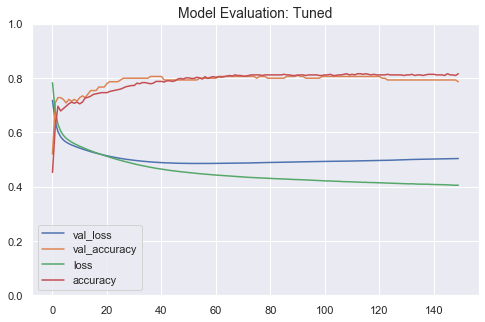

154/154 [==============================] - 0s 26us/step
[0.5553049774138958, 0.7337662577629089]


In [69]:
# create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(16, input_dim = 8, activation = 'relu'))
model.add(Dropout(0))
model.add(Dense(4, activation = 'relu'))
model.add(Dropout(0))
model.add(Dense(1, activation = 'sigmoid'))

# compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy", optimizer = "sgd", metrics=['accuracy'])

# call the function to fit to the data (training the network)
history = model.fit(X_train, y_train, epochs = 150, batch_size=20, validation_data=(X_val, y_val))

# Plot the training history
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.title('Model Evaluation: Tuned', size = 14)
plt.gca().set_ylim(0,1)
plt.show()

# Check the accuracy of the model
print(model.evaluate(X_test, y_test))


In [70]:
# Look at the model summary
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_37 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 4)                 68        
_________________________________________________________________
dropout_38 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 5         
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________
